## One of the aspects seattle is most notable for is its rains.We have data from January 1,1948 to December 12,2017 and this dataset provides full records of Seattles daily rainfall patterns. We will build a predictive model to detect the possibility of rains on a given day.

#### Data Dictionary:
* date: The date when the observation was recorded
* PRCP: The amount of precipitation in inches
* Max: The maximum temperature for that day
* Tmin: The minimum temperature for that day
* RAIN: True if rains,False if it doesnt rain

In [1]:
##### loading libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('seattleweather.csv')
dataset.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [4]:
dataset.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [5]:
#### checking the rows with missing values for prcp:
dataset[dataset['PRCP'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [6]:
dataset[dataset['RAIN'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [9]:
dataset.shape

(25548, 5)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [11]:
dataset['RAIN']=le.fit_transform(dataset['RAIN'])

In [12]:
dataset.RAIN.dtypes

dtype('int64')

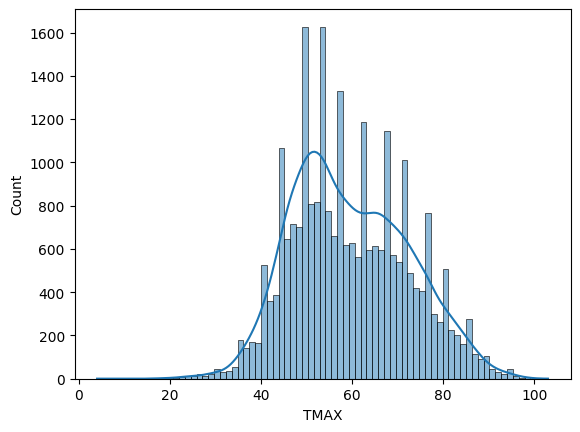

In [13]:
sns.histplot(dataset['TMAX'],kde=True)
plt.show()

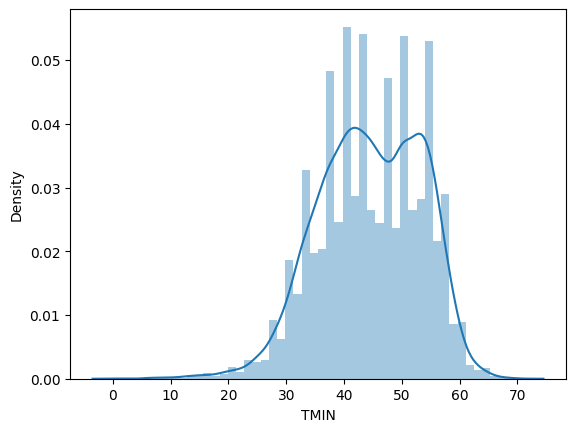

In [14]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(dataset['TMIN'])
plt.show()

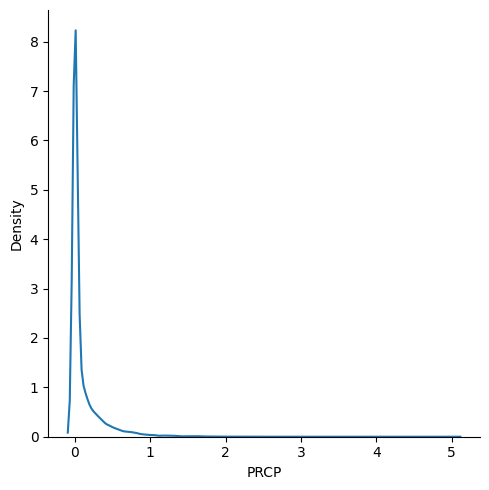

In [15]:
sns.displot(dataset['PRCP'],kind='kde')
plt.show()

In [16]:
dataset.describe()

,PRCP,TMAX,TMIN,RAIN
count,25548.000000,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387,0.426648
std,0.239031,12.773265,8.893019,0.494600
min,0.000000,4.000000,0.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,103.000000,71.000000,1.000000


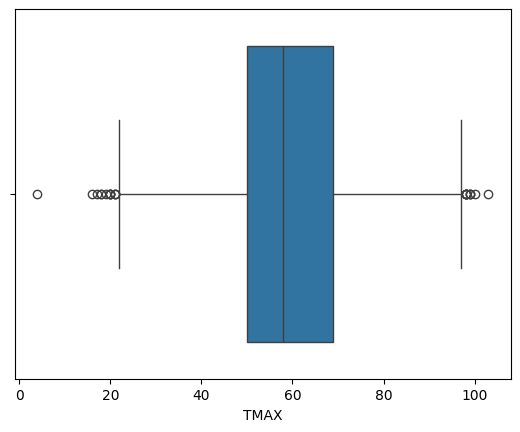

In [17]:
#### distribution of outliers:
sns.boxplot(x=dataset['TMAX'])
plt.show()

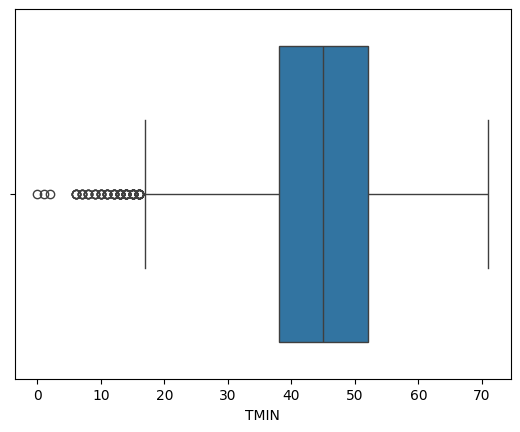

In [18]:
sns.boxplot(x=dataset['TMIN'])
plt.show()

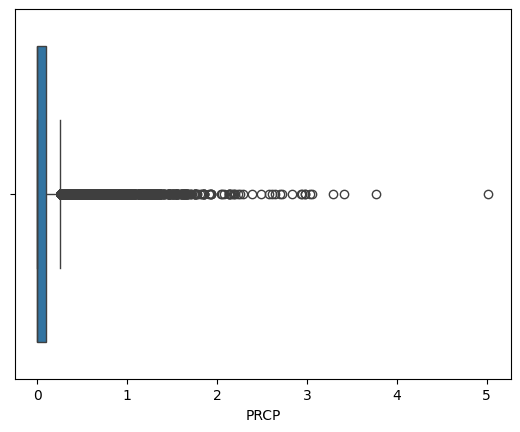

In [19]:
sns.boxplot(x=dataset['PRCP'])
plt.show()

In [20]:
dataset.drop(dataset[(dataset['TMAX']>97)|(dataset['TMAX']<21)].index,inplace=True)

In [21]:
dataset.drop(dataset[(dataset['TMIN']<17)].index,inplace=True)

In [22]:
dataset.drop(dataset[dataset['PRCP']>0.1].index,inplace=True)

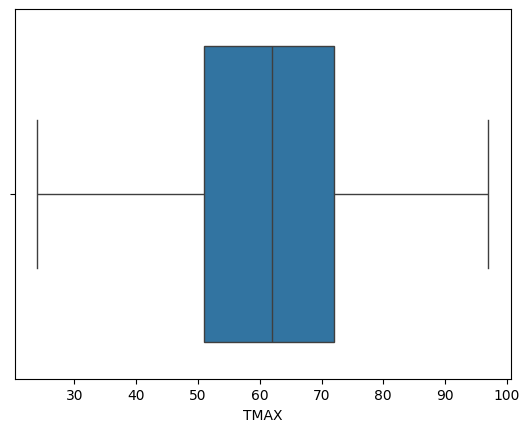

In [23]:
#### checking for outliers:
sns.boxplot(x=dataset['TMAX'])
plt.show()

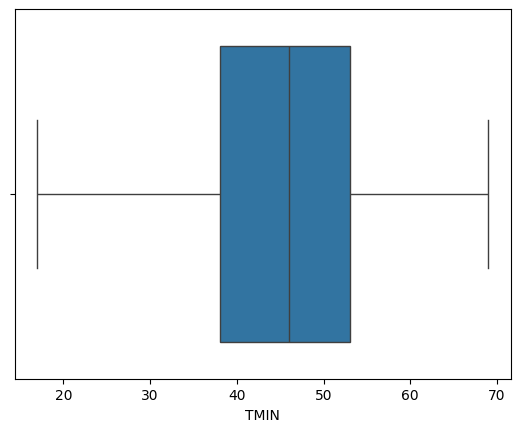

In [24]:
sns.boxplot(x=dataset['TMIN'])
plt.show()

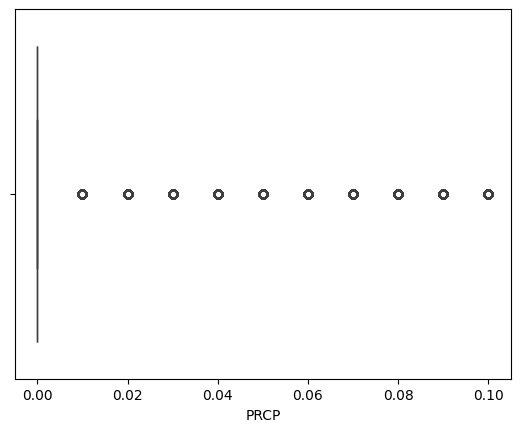

In [25]:
sns.boxplot(x=dataset['PRCP'])
plt.show()

In [26]:
dataset.shape


(19131, 5)

In [27]:
###### bifurcate the dataset into feature set and dv set:
X= dataset.drop(['RAIN','DATE'],axis=1) #axis=1 implies columns,axis=0 implies rows-by default functions are applied on rows.
y=dataset['RAIN']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [30]:
### building the model:
log.fit(X_train,y_train)

LogisticRegression()

In [31]:
pred=log.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)
accuracy

0.9054006968641115

In [33]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
y_test

5478     0
7481     0
10041    0
17314    0
8386     0
        ..
3197     1
25339    0
14087    0
14508    0
11812    0
Name: RAIN, Length: 5740, dtype: int64

In [35]:
log.predict_proba(X_test)

array([[0.55809815, 0.44190185],
       [0.96690242, 0.03309758],
       [0.93472893, 0.06527107],
       ...,
       [0.92315731, 0.07684269],
       [0.98097878, 0.01902122],
       [0.98935571, 0.01064429]])

In [36]:
#### The first value in the above is (1-p) and the 2nd column gives us the probability of success(p)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,pred)
cm

array([[4395,   26],
       [ 517,  802]])

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4421
           1       0.97      0.61      0.75      1319

    accuracy                           0.91      5740
   macro avg       0.93      0.80      0.84      5740
weighted avg       0.91      0.91      0.90      5740

